# TP1

In [62]:
import pandas as pd

def loadData(file):
    # Charger les données CSV en spécifiant les noms de colonnes
    data = pd.read_csv(file, index_col=3,  
                       names=['gender', 'genderLooking', 'age', 'name', 'counts_details', 'counts_pictures', 
                              'counts_profileVisits', 'counts_kisses', 'counts_fans', 'counts_g', 
                              'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date', 
                              'country', 'city', 'location', 'distance', 'isFlirtstar', 'isHighlighted', 
                              'isInfluencer', 'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 
                              'lang_fr', 'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified', 
                              'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd', 'crypt', 
                              'freetext', 'whazzup', 'userId', 'pictureId', 'isSystemProfile'])
    
    return data

# Charger les données depuis le fichier CSV
dataset = loadData("lovoo_v3_users_api-results.csv")


In [63]:
 
# SUPPRESSION DES DONNÉES EN DOUBLON 

# Filtrer les enregistrements qui ne sont pas en double ou où pictureId est vide
dataset_unique = dataset[~dataset['pictureId'].duplicated() | dataset['pictureId'].isnull()]

# Affecter les résultats uniques au jeu de données d'origine
dataset = dataset_unique.copy()

# CONVERSION DES DONNÉES

# CONVERSION DES DONNÉES BINAIRES
   
# Mapping des valeurs
mapping = {'true': 1, 'false': 0}

# Appliquer le mapping à chaque colonne
dataset['flirtInterests_chat'] = dataset['flirtInterests_chat'].replace(mapping)
dataset['flirtInterests_friends'] = dataset['flirtInterests_friends'].replace(mapping)
dataset['flirtInterests_date'] = dataset['flirtInterests_date'].replace(mapping)

# Discrétisation de la variable 'gender' selon les catégories spécifiées
def discretiser_gender(categorie):
    if categorie == 'M':
        return 1
    elif categorie == 'F':
        return 2
    elif categorie == 'both':
        return 3
    elif categorie == 'none':
        return 4


# Appliquer la fonction de discrétisation à la colonne 'gender' et créer une nouvelle colonne 'gender_discretise'
dataset['gender_discretise'] = dataset['gender'].apply(discretiser_gender).fillna(0)

# Appliquer la fonction de discrétisation à la colonne 'genderLooking' et créer une nouvelle colonne 'gender_look_discretise'
dataset['gender_look_discretise'] = dataset['genderLooking'].apply(discretiser_gender).fillna(0)

# Identifier les colonnes booléennes
colonnes_boolean = dataset.select_dtypes(include='bool').columns

# Convertir les colonnes booléennes en valeurs binaires (1 pour True, 0 pour False)
dataset[colonnes_boolean] = dataset[colonnes_boolean].astype(int)

# CONVERSION DES COLONNES NUMERIQUES

# Liste des colonnes à convertir en numérique et à gérer les valeurs nulles
colonnes_numeriques = ['age', 'counts_details', 'counts_pictures', 'counts_profileVisits', 
                       'counts_kisses', 'counts_fans', 'counts_g', 'distance', 
                       'isFlirtstar', 'isHighlighted', 'isMobile', 'isNew', 
                       'isOnline', 'isVip', 'lang_count', 'verified', 'shareProfileEnabled',
                       'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']

# Boucler sur chaque colonne et appliquer la conversion ainsi que le remplissage des valeurs nulles
for col in colonnes_numeriques:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce').fillna(0)

# CRÉATION DE NOUVELLES CARACTÉRISTIQUES ET DISCRETISATION 

# Calculer le taux de bisous par visite et arrondir à deux décimales
dataset['taux_aime'] = (dataset['counts_kisses'] / dataset['counts_profileVisits'] * 100).round(2)

# Discrétisation de la variable taux_aime dans une nouvelle colonne 'aime_5_pct', selon les conditions spécifiées
dataset['aime_5_pct'] = dataset['taux_aime'].apply(lambda x: 0 if x < 5 else 1)

# Discrétisation de la variable counts_profileVisits dans une nouvelle colonne '10_visites' selon les conditions spécifiées
dataset['10_visites'] = dataset['counts_profileVisits'].apply(lambda x: 0 if x < 10 else 1)  

# Créer la nouvelle colonne 'compte_populaire' basée sur les conditions spécifiées
dataset['compte_populaire'] = dataset.apply(lambda row: 1 if row['aime_5_pct'] == 1 and row['10_visites'] == 1 else 0, axis=1)

# APERCU DES RÉSULTATS CONVERTIS

# Définir les options d'affichage pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

# Imprimer les premières lignes du DataFrame avec toutes les colonnes
print(dataset.head())

print("\n")

# Compter combien de fois "plus_10_visites" apparaît dans la colonne 10_visites
count_plus_10_visites = dataset['10_visites'].value_counts().get(1, 0)

print(f'Nombre de "plus_10_visites": {count_plus_10_visites}')

# Compter combien de fois "plus_5_pct_aime" apparaît dans la colonne aime_5_pct
count_plus_5_pct_aime = dataset['aime_5_pct'].value_counts().get(1, 0)

print(f'Nombre de "plus_5_pct_aime": {count_plus_5_pct_aime}')

# Compter combien de fois "populaire" apparaît dans la colonne compte_populaire
count_populaire = dataset['compte_populaire'].value_counts().get(1, 0)

# Afficher le nombre de fois où "populaire" apparaît dans la colonne compte_populaire
print(f'Nombre de valeurs "populaire": {count_populaire}')


             gender  genderLooking   age  counts_details  counts_pictures  \
name                                                                        
name         gender  genderLooking   0.0            0.00              0.0   
daeni             F              M  25.0            1.00              4.0   
italiana 92       F              M  22.0            0.85              5.0   
Lauraaa           F              M  21.0            0.00              4.0   
Qqkwmdowlo        F           none  20.0            0.12              3.0   

             counts_profileVisits  counts_kisses  counts_fans  counts_g  \
name                                                                      
name                          0.0            0.0          0.0       0.0   
daeni                      8279.0          239.0          0.0       3.0   
italiana 92                 663.0           13.0          0.0       0.0   
Lauraaa                    1369.0           88.0          0.0       2.0   
Qqkwmdowlo

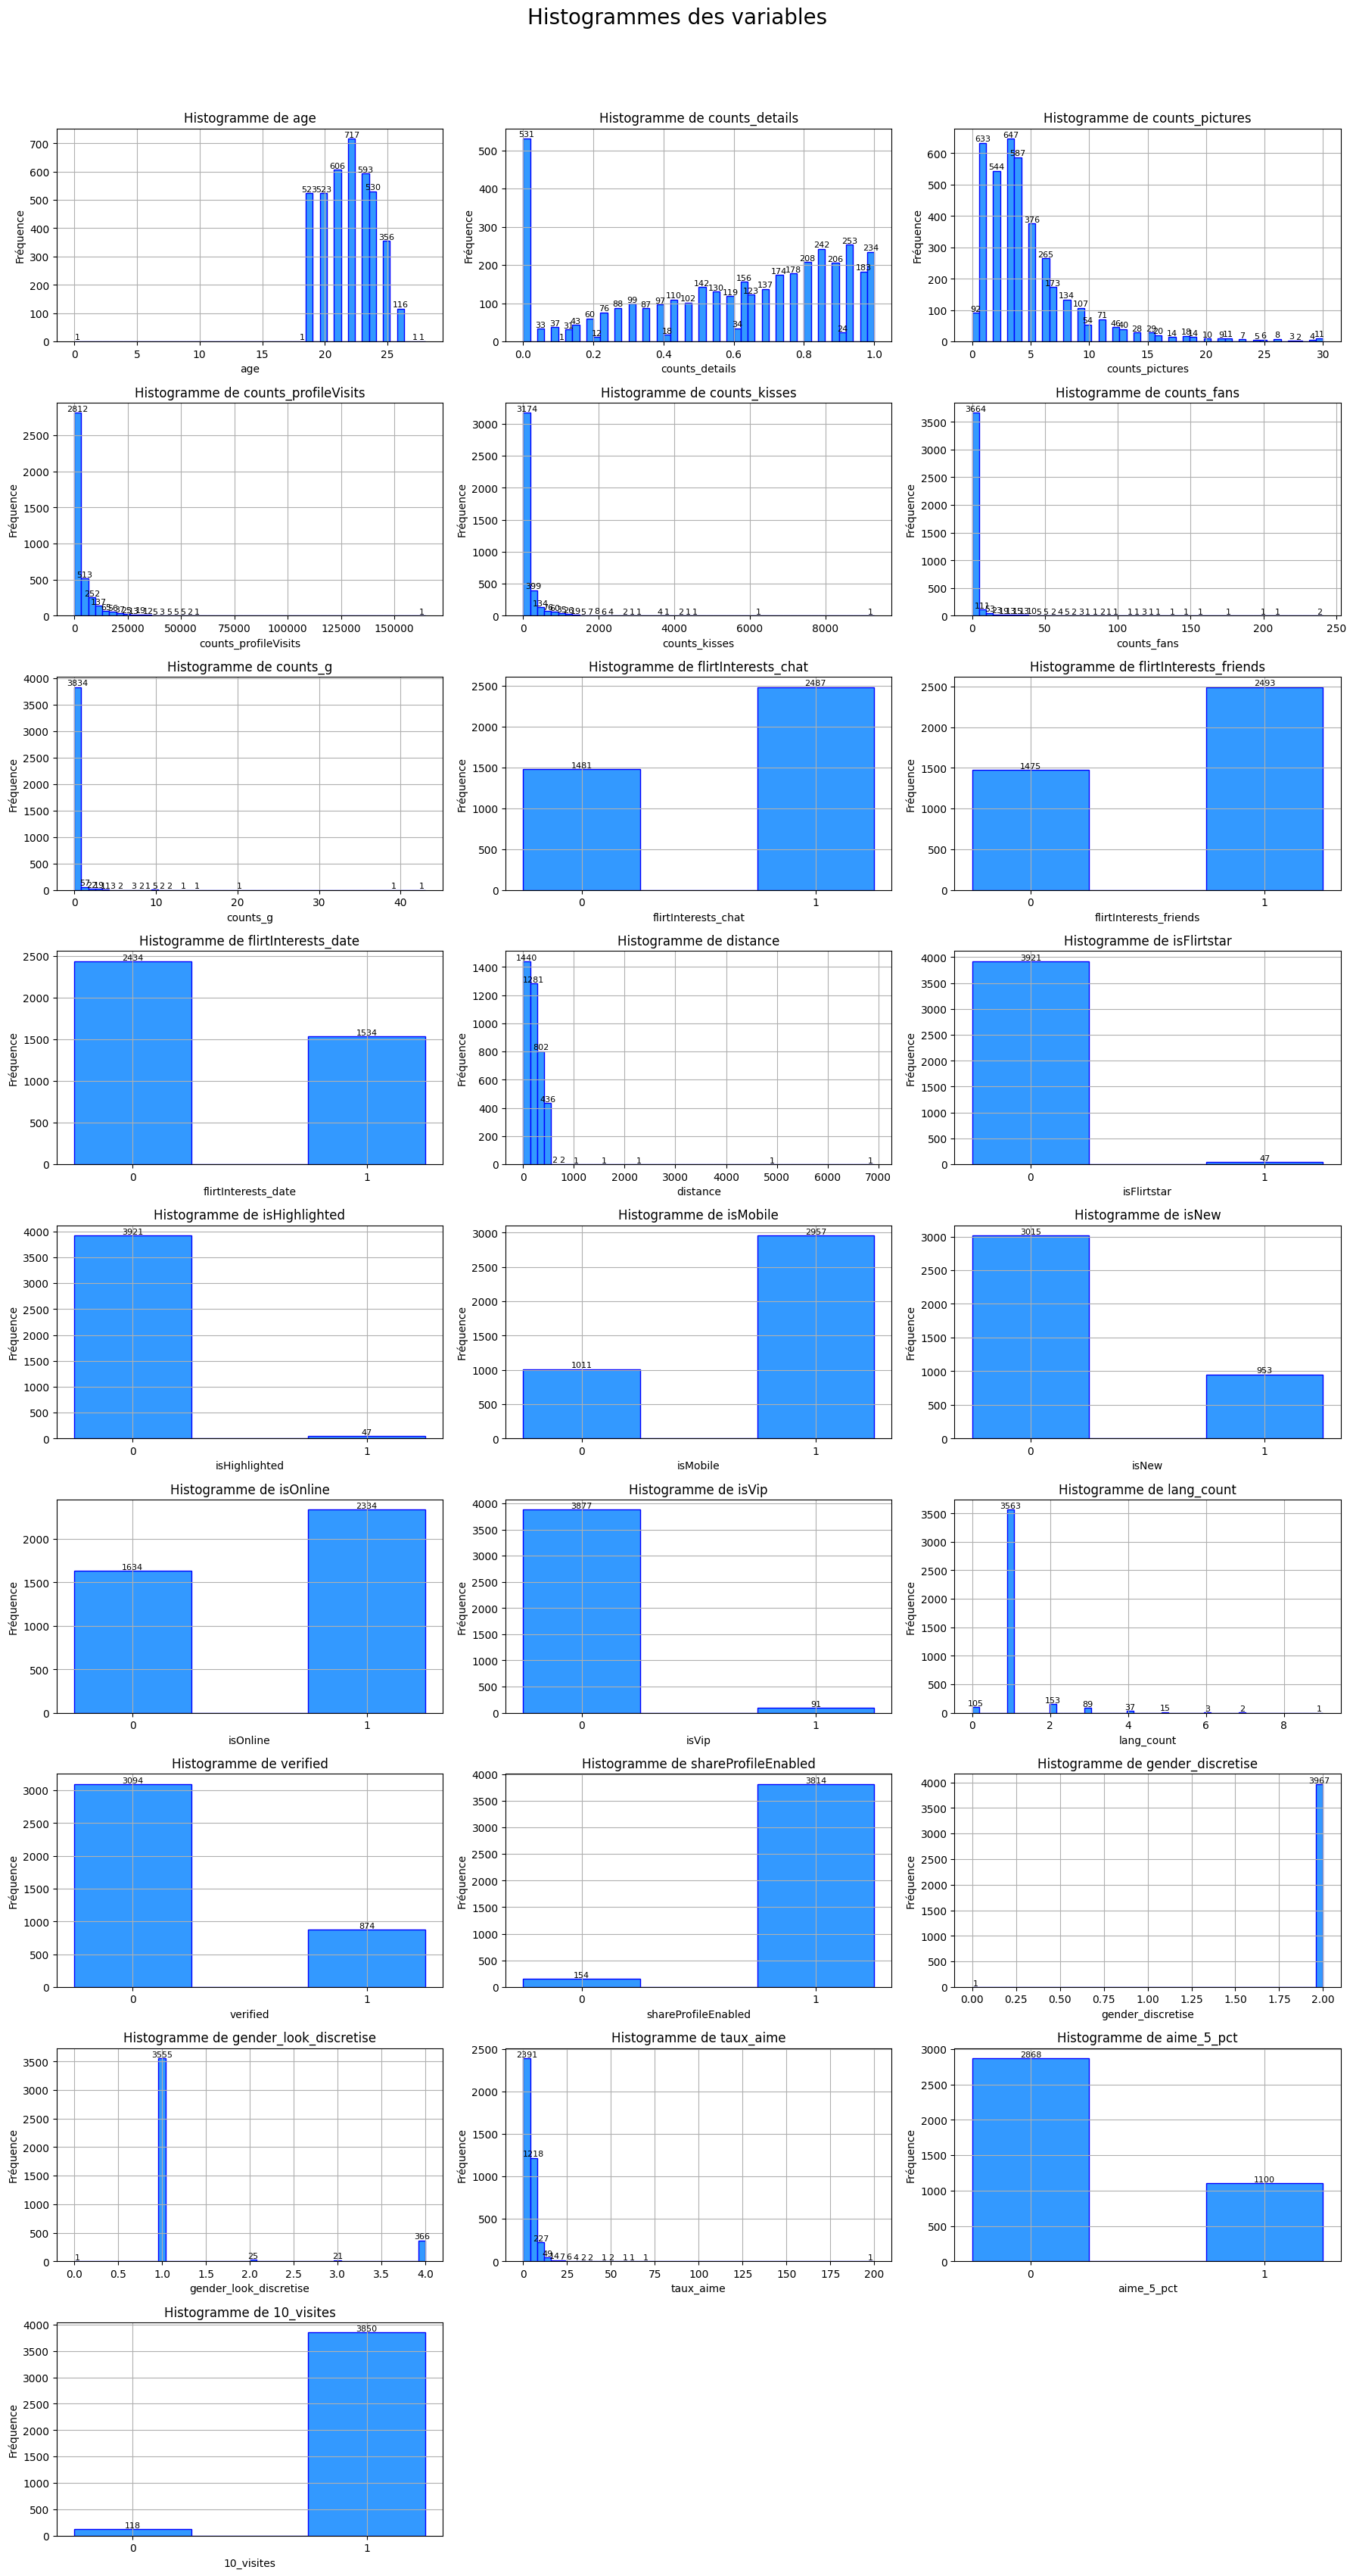

In [64]:
import time
import pandas as pd
import matplotlib.pyplot as plt


# Fonction pour afficher les histogrammes des variables numériques
def afficher_histogrammes(dataset, titre):
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:25]
    
    # Ajuster la taille de la figure pour afficher les histogrammes
    plt.figure(figsize=(18, 40))  # Taille ajustée à 18x40 pouces pour chaque histogramme
    plt.suptitle(titre, y=1.02, fontsize=20)  # Ajouter un titre en haut avec un petit espacement
    
    # Itérer sur chaque colonne sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        # Créer un subplot pour chaque histogramme
        ax = plt.subplot(11, 3, i + 1)
        
        # Vérifier si la colonne est binaire (0 ou 1)
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=[-0.25, 0.25, 0.75, 1.25], color='#3399FF', edgecolor='blue', align='mid')
            plt.xticks([0, 1], ['0', '1'])  # Étiqueter l'axe des x avec 0 et 1
        else:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=50, color='#3399FF', edgecolor='blue')
        
        plt.title(f'Histogramme de {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Fréquence', fontsize=10)
        plt.grid(True)
        
        # Afficher le nombre total au sommet de chaque barre (uniquement si différent de zéro).
        for count, x in zip(counts, bins):
            if count != 0:
                ax.text(x + (bins[1] - bins[0]) / 2, count + 0.5, int(count), ha='center', va='bottom', fontsize=8, color='black')
    
    plt.tight_layout()
    plt.show()

# Utilisation avec votre ensemble de données
afficher_histogrammes(dataset, "Histogrammes des variables")


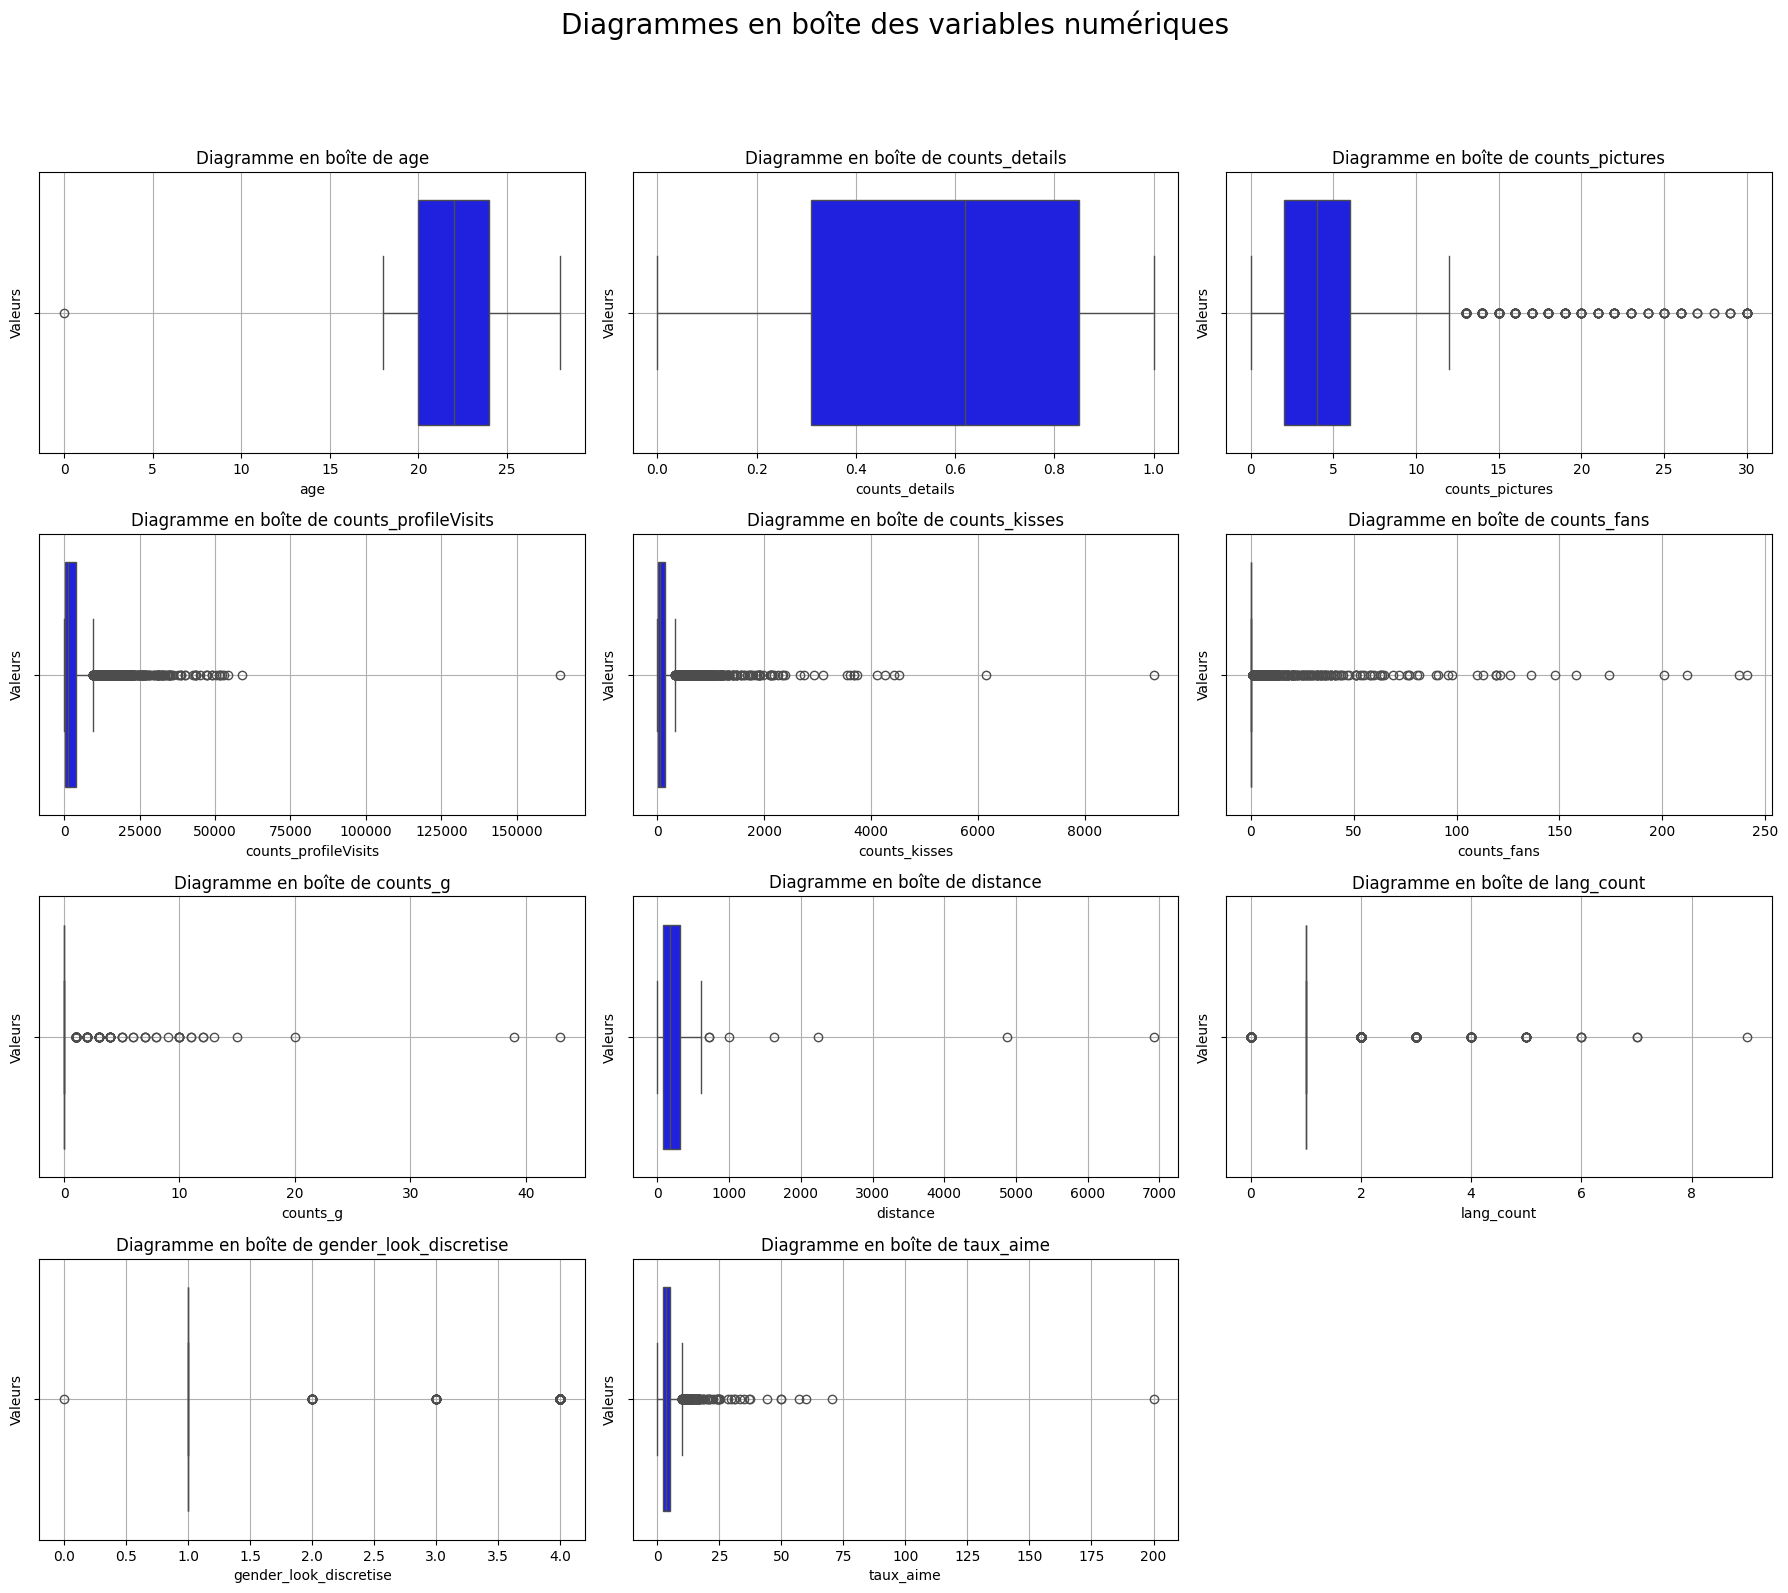

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que le dataset a des index dupliqués
dataset = dataset.reset_index(drop=True)

# Fonction pour afficher les diagrammes en boîte des variables numériques, en excluant des variables spécifiques
def afficher_diagrammes_de_boite(dataset, titre):
    # Sélection des colonnes numériques, en excluant les binaires et la variable 'gender_discretise'
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:25]
    colonnes_a_exclure = ['gender_discretise']  # Colonnes supplémentaires à exclure
    
    for col in colonnes_numeriques:
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            colonnes_a_exclure.append(col)
    
    colonnes_numeriques = [col for col in colonnes_numeriques if col not in colonnes_a_exclure]
    
    # Ajustement de la taille de la figure pour les diagrammes en boîte
    plt.figure(figsize=(18, 40))
    plt.suptitle(titre, y=1.02, fontsize=20)
    
    # Itération sur chaque colonne numérique sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        ax = plt.subplot(11, 3, i + 1)
        
        # Dessiner le diagramme en boîte
        sns.boxplot(x=dataset[col], ax=ax, color='blue')
        
        plt.title(f'Diagramme en boîte de {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Valeurs', fontsize=10)
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Utilisation avec l'ensemble de données
afficher_diagrammes_de_boite(dataset, "Diagrammes en boîte des variables numériques")



Columnas con NaN: ['city', 'location', 'lastOnlineDate', 'lastOnlineTime', 'crypt', 'freetext', 'whazzup', 'pictureId', 'isSystemProfile', 'taux_aime']


ValueError: num must be an integer with 1 <= num <= 9, not 10

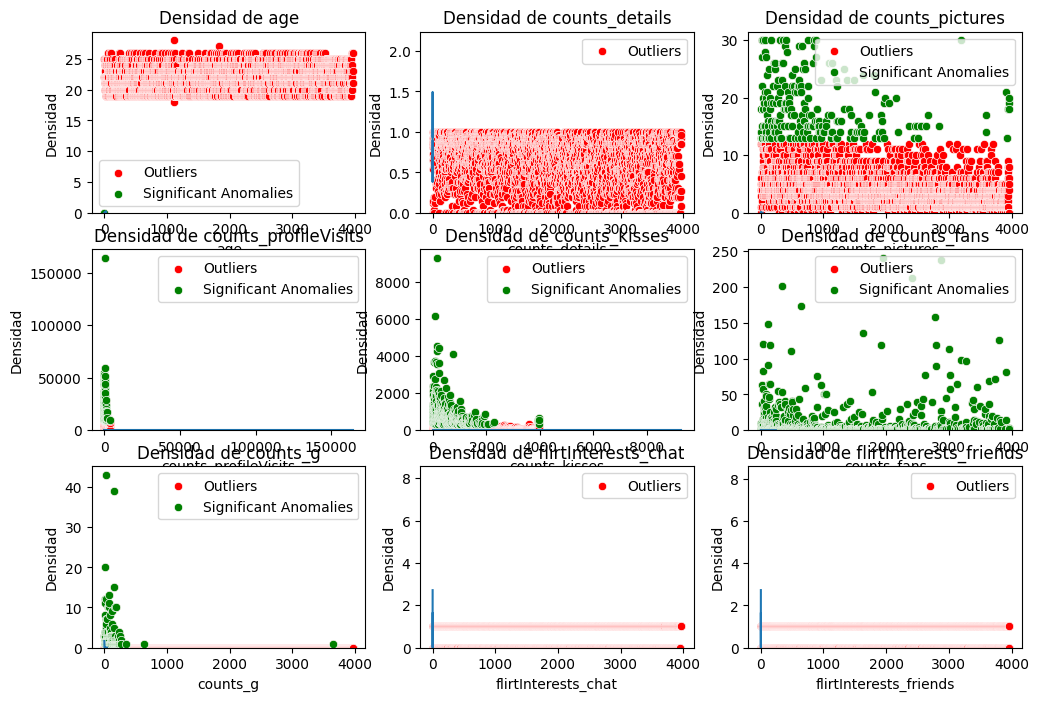

In [66]:
# Verificar qué columnas contienen NaN
columnas_con_nan = dataset.columns[dataset.isna().any()].tolist()
print(f"Columnas con NaN: {columnas_con_nan}")


# Liste des colonnes à supprimer
colonnes_a_supprimer = ['city', 'location', 'lastOnlineDate', 'lastOnlineTime', 'crypt', 
                        'freetext', 'whazzup', 'pictureId', 'isSystemProfile', 'taux_aime']

# Supprimer les colonnes spécifiées
dataset = dataset.drop(colonnes_a_supprimer, axis=1)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Función para graficar densidad y detectar outliers con DBSCAN
def graficar_densidad_y_dbscan(dataset):
    # Seleccionar solo las columnas numéricas para el análisis
    columnas_numericas = dataset.select_dtypes(include=['float64', 'int64'])
       
 
    
    # Escalar los datos
    scaler = StandardScaler()
    dataset_scaled = scaler.fit_transform(columnas_numericas)
    
    # Aplicar DBSCAN
    eps = 0.5  # Radio máximo entre puntos para ser considerados vecinos
    min_samples = 5  # Número mínimo de puntos para formar un cluster
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(dataset_scaled)
    
    # Configurar el tamaño de la figura
    plt.figure(figsize=(12, 8))
    
    # Iterar sobre cada columna numérica y graficar la densidad
    for i, col in enumerate(columnas_numericas.columns):
        plt.subplot(3, 3, i + 1)  # Ajustar según el número de columnas numéricas
        sns.histplot(dataset[col], kde=True, stat='density', linewidth=0)  # Utilizar linewidth=0 para puntos
        plt.title(f'Densidad de {col}')
        plt.xlabel(col)
        plt.ylabel('Densidad')
        
        # Destacar los outliers detectados por DBSCAN (valores -1) con puntos rojos
        outliers_mask = clusters == -1
        sns.scatterplot(x=dataset[col][outliers_mask].index, y=dataset[col][outliers_mask], color='r', label='Outliers')
        
        # Identificar datos anormales usando el rango intercuartílico (IQR)
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar datos anormales que están significativamente alejados
        anomalous_mask = (dataset[col] < lower_bound) | (dataset[col] > upper_bound)
        sns.scatterplot(x=dataset[col][anomalous_mask].index, y=dataset[col][anomalous_mask], color='g', label='Significant Anomalies')
        
        plt.legend()
        
    plt.tight_layout()
    plt.show()

# Ejemplo de uso: Graficar densidad y detectar outliers con DBSCAN
graficar_densidad_y_dbscan(dataset)





In [ ]:
import pandas as pd
import numpy as np

# IDENTIFICATION DES INCOHÉRENCES 

# Filtrer les lignes où counts_bisous est inférieur ou égal à counts_visitesProfil
dataset = dataset[dataset['counts_kisses'] <= dataset['counts_profileVisits']]

# SUPPRESSION DES DONNÉES ABERRANTES 

def remove_outliers(df, col_name, quantile=0.1):
    # Calcul des percentiles P10 et P90
    P10 = df[col_name].quantile(quantile)
    P90 = df[col_name].quantile(1 - quantile)
    # Calcul de l'écart inter-percentile (PIP)
    PIP = P90 - P10
    # Calcul des bornes inférieure et supérieure pour identifier les valeurs aberrantes
    limite_inferieure = P10 - 1.5 * PIP
    limite_superieure = P90 + 1.5 * PIP
    # Filtrage du DataFrame original pour supprimer les valeurs aberrantes
    df_filtre = df[(df[col_name] >= limite_inferieure) & (df[col_name] <= limite_superieure)]
    return df_filtre

# Filtrer les valeurs aberrantes pour chaque colonne spécifiée
dataset = remove_outliers(dataset, 'counts_profileVisits', quantile=0.1)
dataset = remove_outliers(dataset, 'counts_kisses', quantile=0.1)
dataset = remove_outliers(dataset, 'counts_pictures', quantile=0.1)
dataset = remove_outliers(dataset, 'counts_fans', quantile=0.1)
dataset = remove_outliers(dataset, 'taux_aime', quantile=0.1)


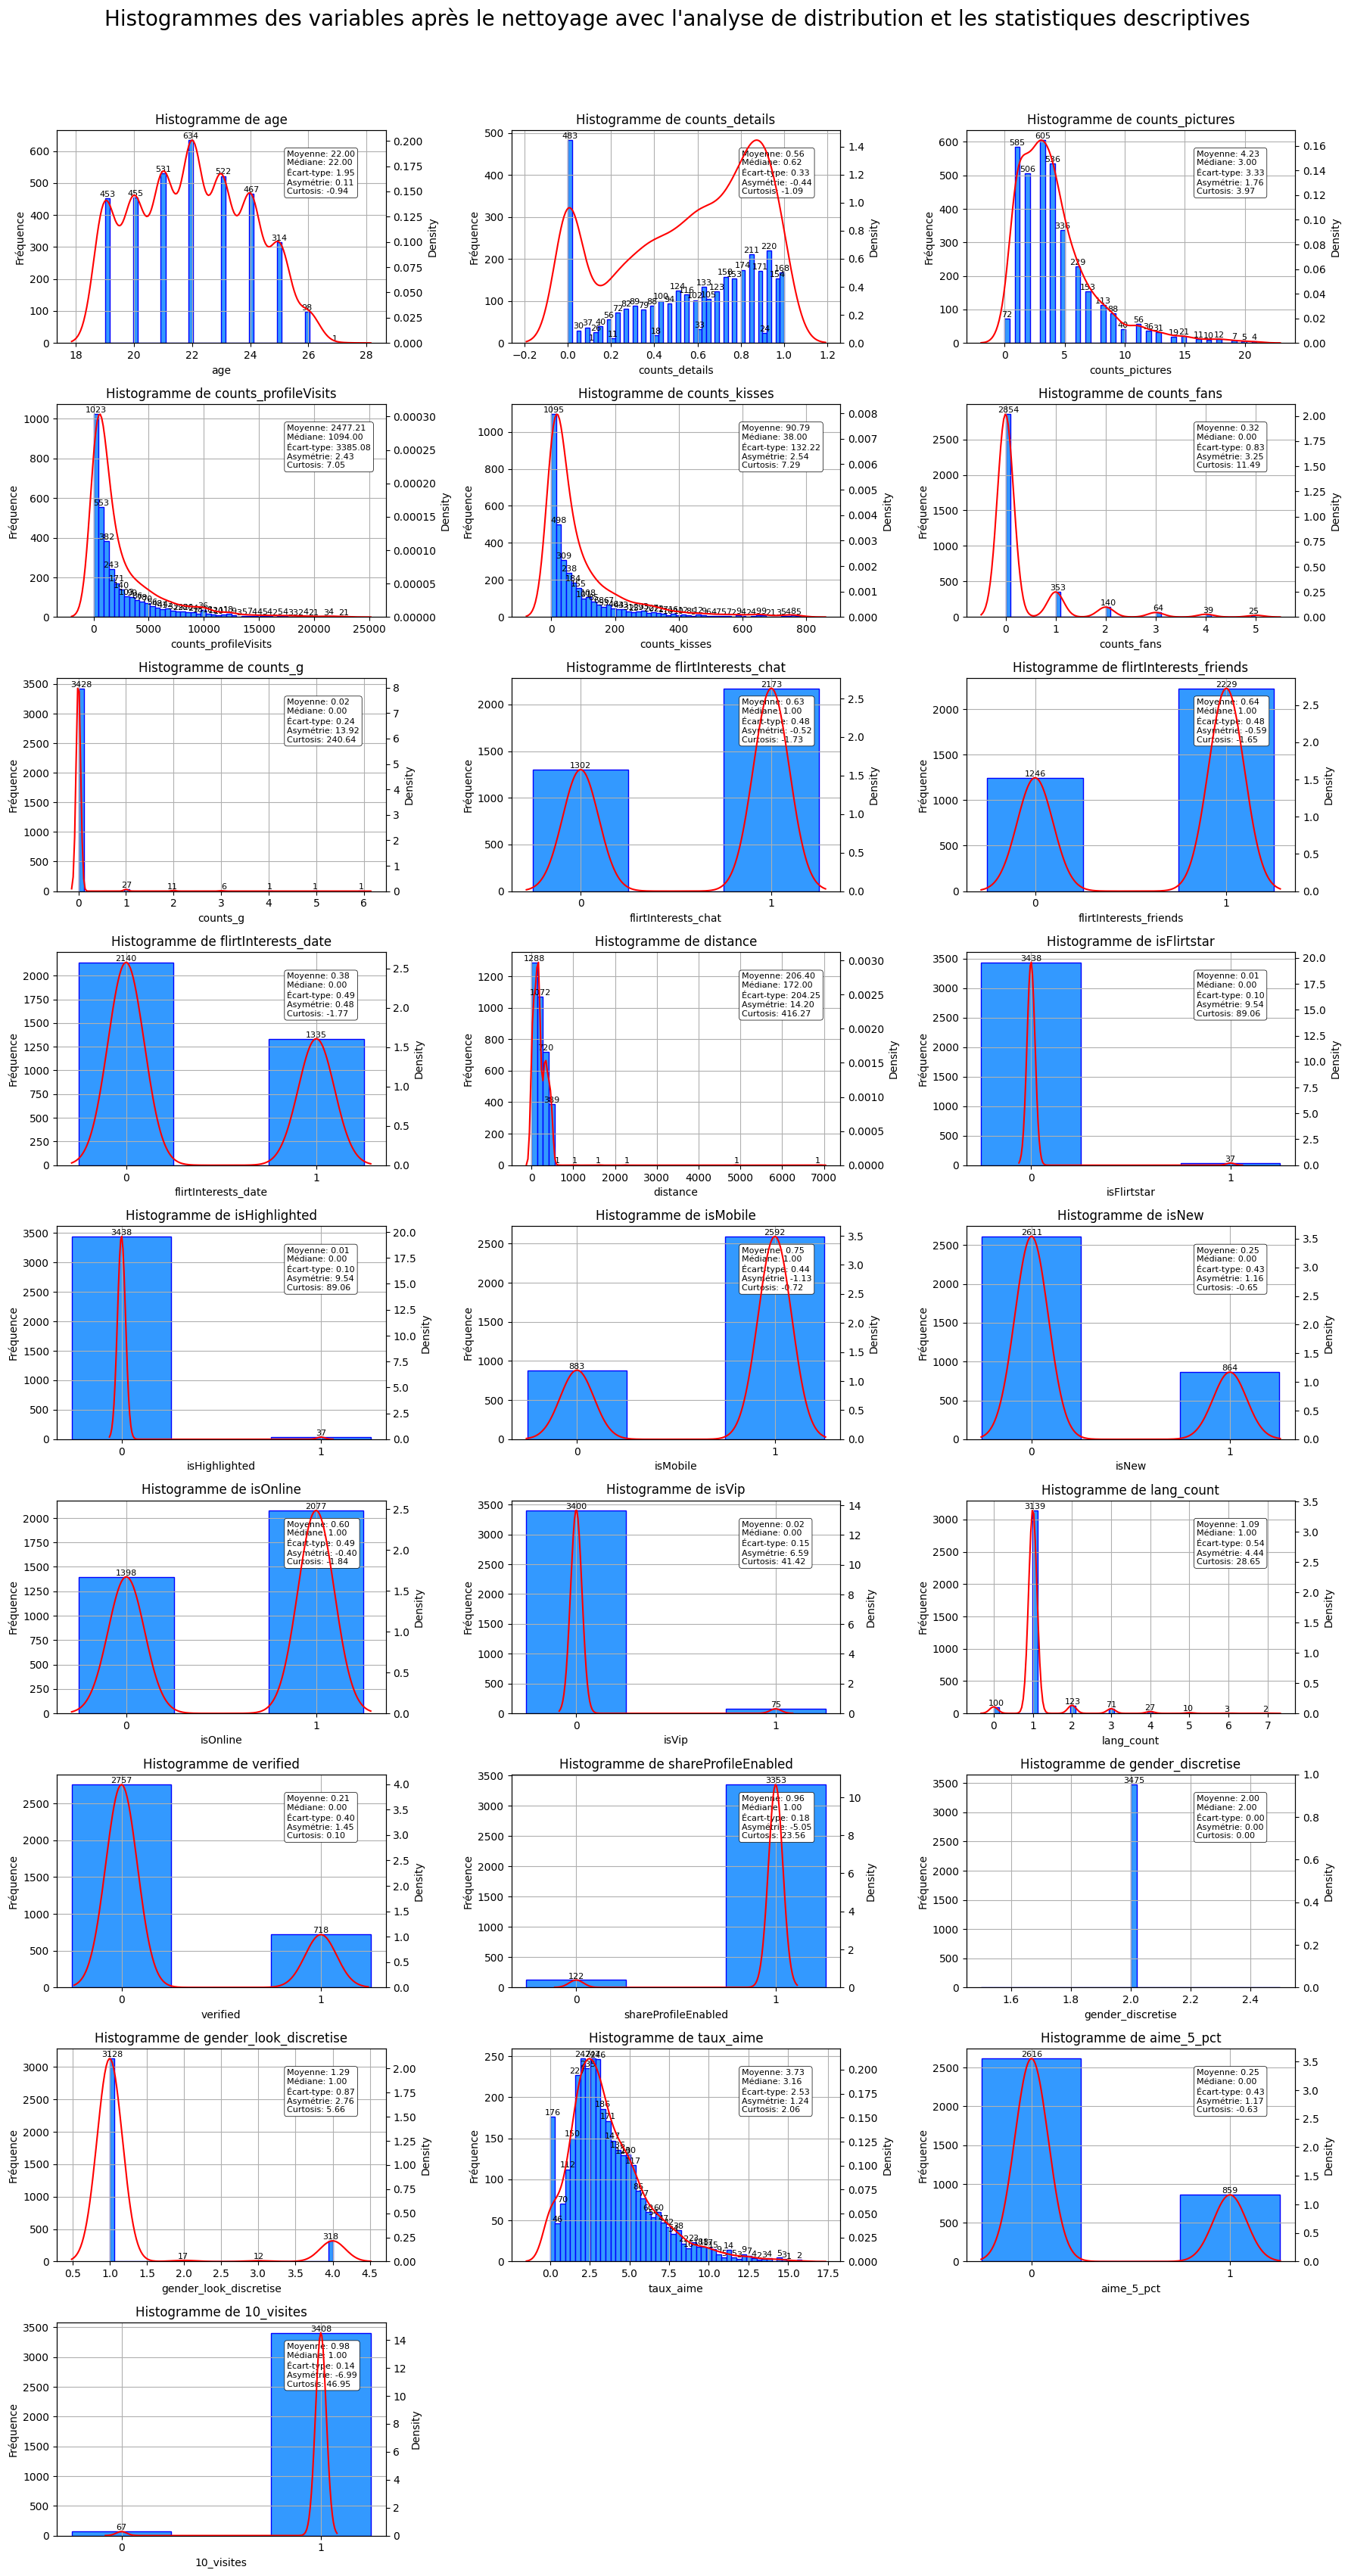

In [ ]:
# Fonction pour afficher les histogrammes et analyser les distributions
def afficher_histogrammes_analyse(dataset, titre):
    colonnes_numeriques = dataset.select_dtypes(include=['int64', 'float64']).columns[:25]
    
    # Ajuster la taille de la figure pour afficher les histogrammes
    plt.figure(figsize=(18, 40))  # Taille ajustée à 18 pouces de largeur et 40 pouces de hauteur pour chaque histogramme
    plt.suptitle(titre, y=1.02, fontsize=20)  # Ajouter un titre en haut avec un petit espacement
    
    # Itérer sur chaque colonne sélectionnée du dataset
    for i, col in enumerate(colonnes_numeriques):
        # Créer un subplot pour chaque histogramme
        ax = plt.subplot(11, 3, i + 1)  # Utilisation de 11 lignes et 3 colonnes pour organiser les sous-graphiques
        
        # Vérifier si la colonne est binaire (0 ou 1)
        if dataset[col].nunique() == 2 and set(dataset[col].unique()) == {0, 1}:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=[-0.25, 0.25, 0.75, 1.25], color='#3399FF', edgecolor='blue', align='mid')
            plt.xticks([0, 1], ['0', '1'])  # Étiqueter l'axe des x avec 0 et 1
        else:
            # Dessiner l'histogramme avec des barres bleues
            counts, bins, _ = ax.hist(dataset[col], bins=50, color='#3399FF', edgecolor='blue')
        
        plt.title(f'Histogramme de {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Fréquence', fontsize=10)
        plt.grid(True)
        
        # Afficher le total de chaque barre au sommet (uniquement si ce n'est pas zéro)
        for count, x in zip(counts, bins):
            if count != 0:
                ax.text(x + (bins[1] - bins[0]) / 2, count + 0.5, int(count), ha='center', va='bottom', fontsize=8, color='black')
        
        # Ajouter une analyse de la distribution
        mean = dataset[col].mean()
        median = dataset[col].median()
        std_dev = dataset[col].std()
        skewness = dataset[col].skew()
        kurtosis = dataset[col].kurtosis()
        
        ax.annotate(f'Moyenne: {mean:.2f}\nMédiane: {median:.2f}\nÉcart-type: {std_dev:.2f}\nAsymétrie: {skewness:.2f}\nCurtosis: {kurtosis:.2f}',
                    xy=(0.7, 0.7), xycoords='axes fraction', fontsize=8, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5))
        
        # Traçage du graphique de densité avec suppression du warning pour variance nulle
        sns.kdeplot(dataset[col], ax=ax.twinx(), color='red', linewidth=1.5, warn_singular=False)
    
    plt.tight_layout()
    plt.show()

# Utilisation :
afficher_histogrammes_analyse(dataset, "Histogrammes des variables après le nettoyage avec l'analyse de distribution et les statistiques descriptives")


In [ ]:
# NORMALISATION

# Normaliser la colonne counts_profileVisits
dataset['norm_visites'] = (dataset['counts_profileVisits'] / dataset['counts_profileVisits'].max()).round(3)

# Normaliser la colonne counts_kisses
dataset['norm_kisses'] = (dataset['counts_kisses'] / dataset['counts_kisses'].max()).round(3)

# Normaliser la colonne counts_details
dataset['norm_pictures'] = (dataset['counts_pictures'] / dataset['counts_pictures'].max()).round(3)

# Normaliser la colonne counts_fans
dataset['norm_fans'] = (dataset['counts_fans'] / dataset['counts_fans'].max()).round(3)

# Normaliser la colonne counts_g
dataset['norm_counts_g'] = (dataset['counts_g'] / dataset['counts_g'].max()).round(3)

# Normaliser la colonne distance
dataset['norm_distance'] = (dataset['distance'] / dataset['distance'].max()).round(3)

# Normaliser la colonne lang_count
dataset['norm_lang_count'] = (dataset['lang_count'] / dataset['lang_count'].max()).round(3)

# Normaliser la colonne age
dataset['norm_age'] = (dataset['age'] / dataset['age'].max()).round(3)




Matrice de corrélation sous forme de heatmap


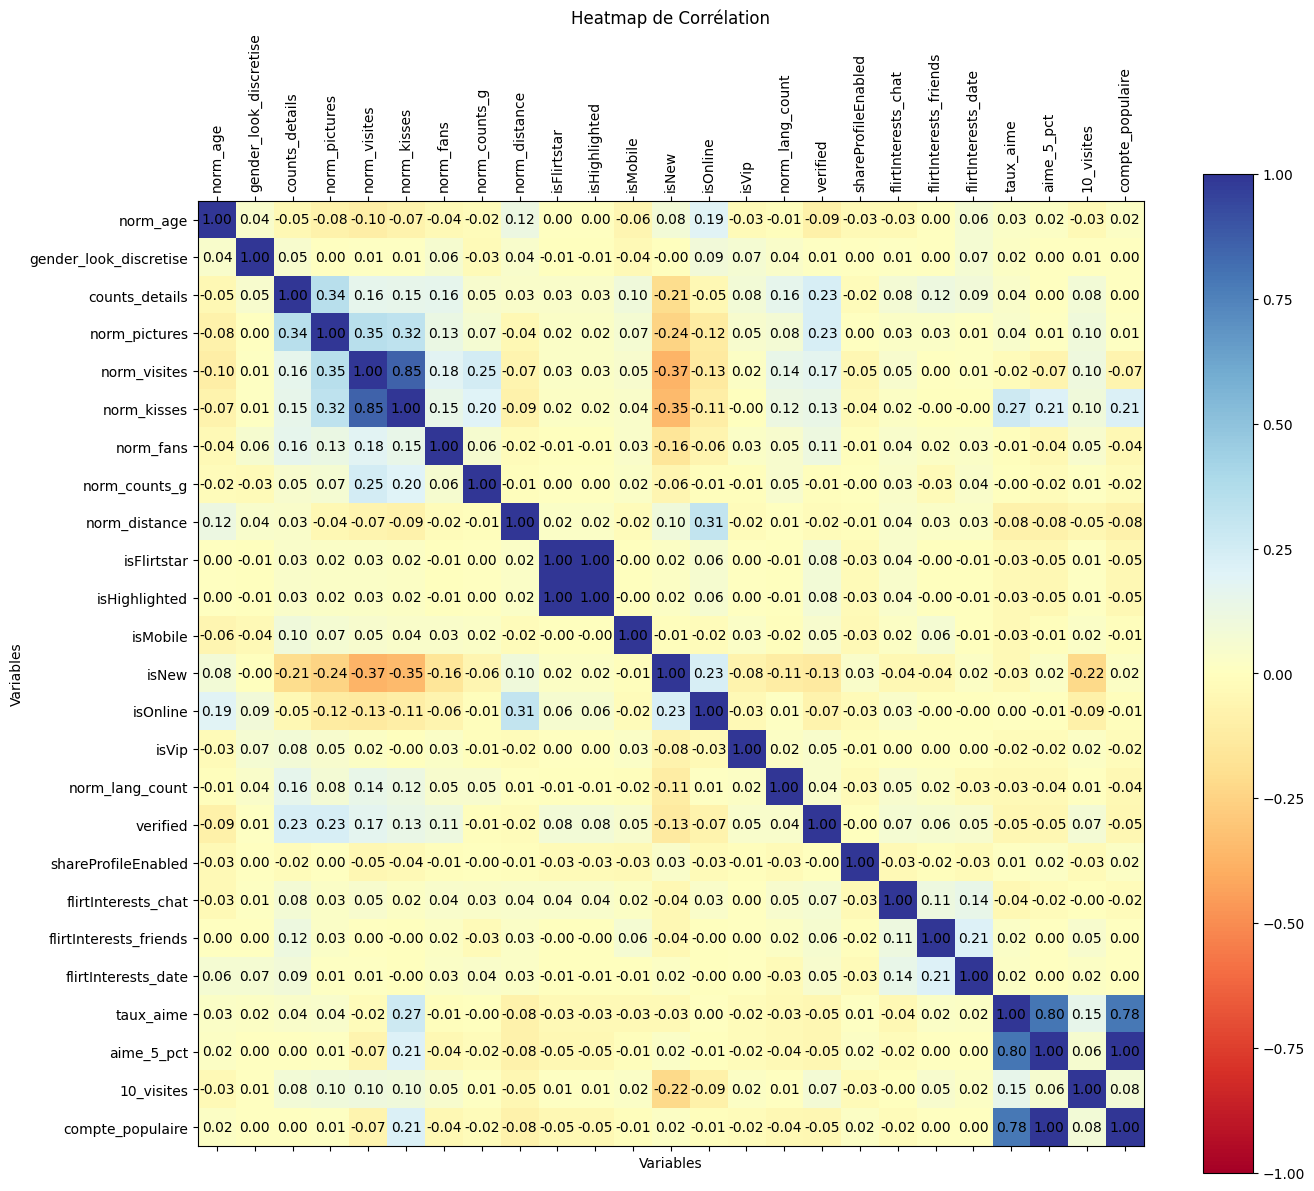

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Définir les options d'affichage pour montrer toutes les colonnes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes

def printCorrelationHeatMap(dataset):
    # Sélectionner uniquement les colonnes numériques
    
    # Spécifier les colonnes numériques que vous voulez inclure
    colonnes = ['norm_age', 'gender_look_discretise', 'counts_details', 'norm_pictures', 'norm_visites', 
                'norm_kisses', 'norm_fans', 'norm_counts_g', 'norm_distance', 
                'isFlirtstar', 'isHighlighted', 'isMobile', 'isNew', 'isOnline', 
                'isVip', 'norm_lang_count', 'verified', 'shareProfileEnabled',
                'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date', 
                'taux_aime', 'aime_5_pct', '10_visites', 'compte_populaire']      
      
    # Créer un nouveau DataFrame avec seulement les colonnes spécifiées
    df_numeric = dataset[colonnes]
    
    # Calculer la matrice de corrélation
    corr_matrix = df_numeric.corr()
    
    print("\nMatrice de corrélation sous forme de heatmap")
    fig = plt.figure(figsize=(14, 12))  # Ajuster la taille de la figure selon les besoins
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_matrix, cmap='RdYlBu', vmin=-1, vmax=1)  # Colormap 'RdYlBu' pour une meilleure visualisation
    fig.colorbar(cax)
    
    # Configurer les étiquettes des axes x et y
    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.columns)))
    
    # Faire pivoter les étiquettes de l'axe x verticalement
    ax.set_xticklabels(corr_matrix.columns, rotation=90)
    ax.set_yticklabels(corr_matrix.columns)
    
    plt.xlabel('Variables')  # Étiquette de l'axe x
    plt.ylabel('Variables')  # Étiquette de l'axe y
    plt.title('Heatmap de Corrélation')  # Titre du heatmap
    
    # Afficher les valeurs de corrélation dans chaque cellule
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
    
    plt.tight_layout()  # Ajuster la disposition pour éviter que les étiquettes ne soient coupées
    plt.show()

# Créer une heatmap de corrélation pour toutes les variables numériques
printCorrelationHeatMap(dataset)


Précision du modèle : 0.78
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       516
           1       1.00      0.14      0.25       179

    accuracy                           0.78       695
   macro avg       0.89      0.57      0.56       695
weighted avg       0.83      0.78      0.71       695



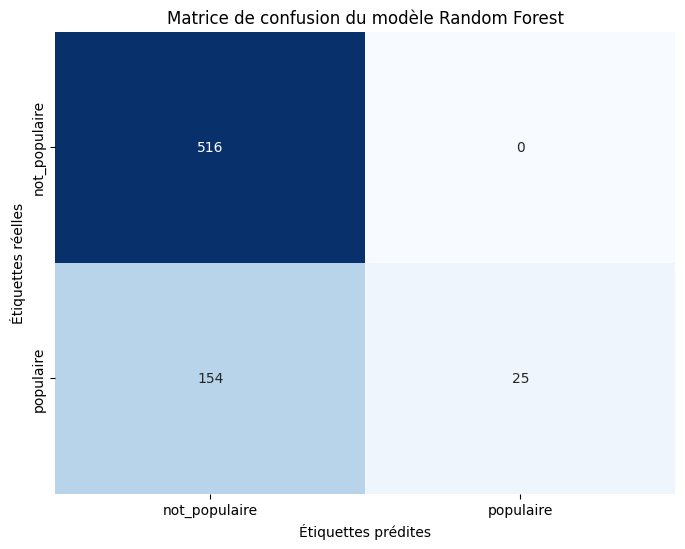

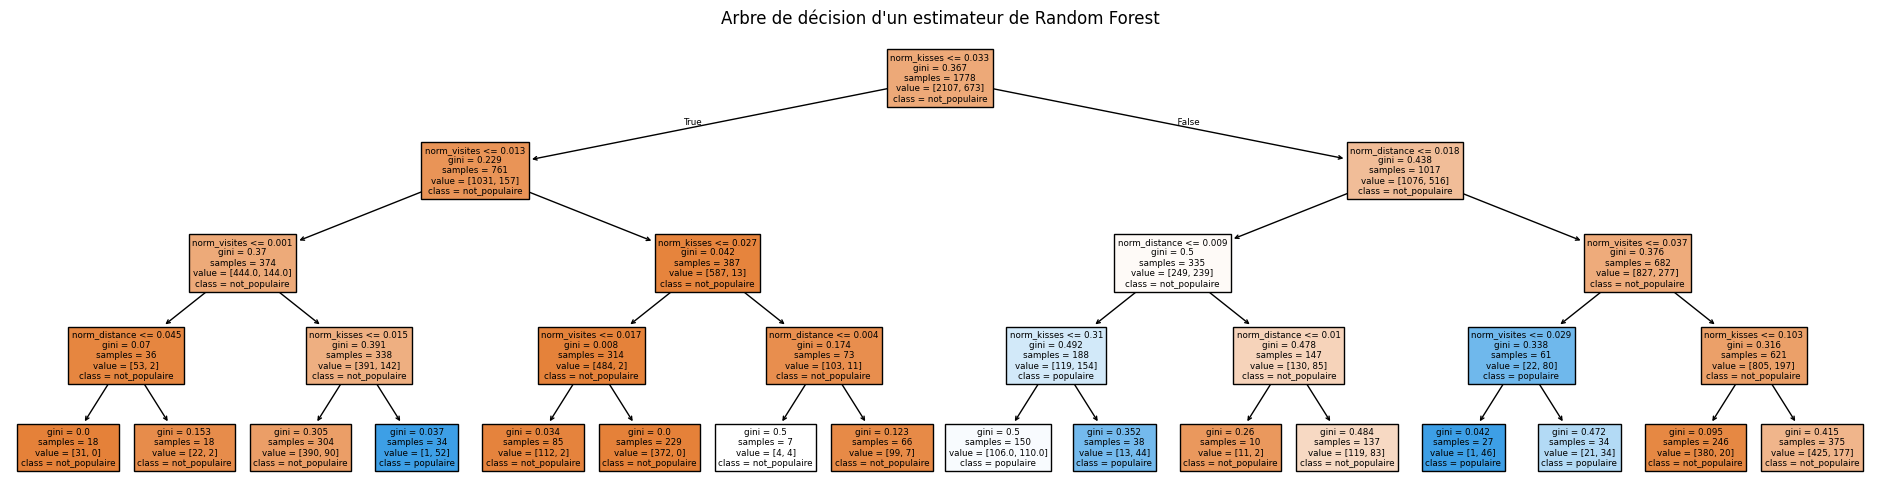

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Fonction pour entraîner et évaluer le modèle Random Forest
def trainAndEvaluateRandomForest(X, y):
    # Diviser les données en jeu d'entraînement et jeu de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Créer le classificateur Random Forest
    clf = RandomForestClassifier(n_estimators=2000, max_depth=4, random_state=42)

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Prédire sur le jeu de test
    y_pred = clf.predict(X_test)

    # Évaluer le modèle
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Précision du modèle : {accuracy:.2f}')

    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))

    # Afficher la matrice de confusion avec des couleurs
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['not_populaire', 'populaire'], yticklabels=['not_populaire', 'populaire'])
    plt.xlabel('Étiquettes prédites')
    plt.ylabel('Étiquettes réelles')
    plt.title('Matrice de confusion du modèle Random Forest')
    plt.show()

    # Tracer l'un des arbres du Random Forest (par exemple, le premier arbre)
    plt.figure(figsize=(24, 6))
    plot_tree(clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['not_populaire', 'populaire'])
    plt.title("Arbre de décision d'un estimateur de Random Forest")
    plt.show()

if __name__ == "__main__":

    # Sélectionner les caractéristiques pertinentes pour le modèle
    features = ['norm_visites', 'norm_kisses', 'norm_distance', 'isFlirtstar', 'isHighlighted', 'verified']

    # Préparer les données d'entrée (X) et la variable cible (y)
    X = dataset[features]
    y = dataset['compte_populaire']

    # Entraîner et évaluer le modèle Random Forest
    trainAndEvaluateRandomForest(X, y)
    
    
    


Précision du modèle : 0.86
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       516
           1       0.91      0.50      0.65       179

    accuracy                           0.86       695
   macro avg       0.88      0.74      0.78       695
weighted avg       0.87      0.86      0.84       695



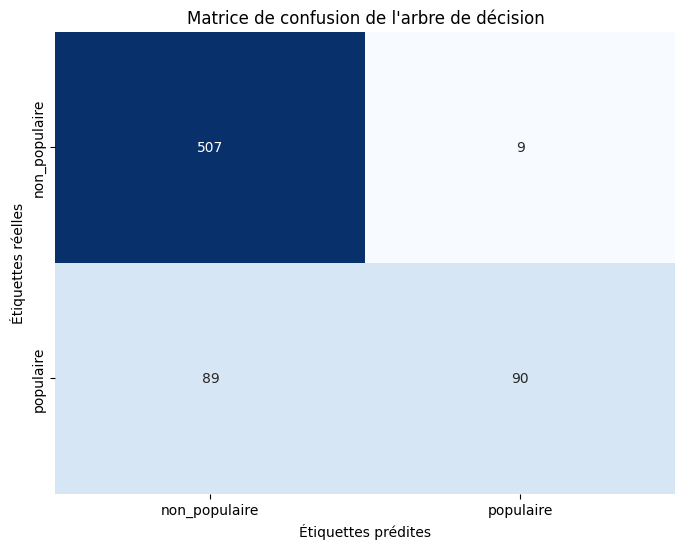

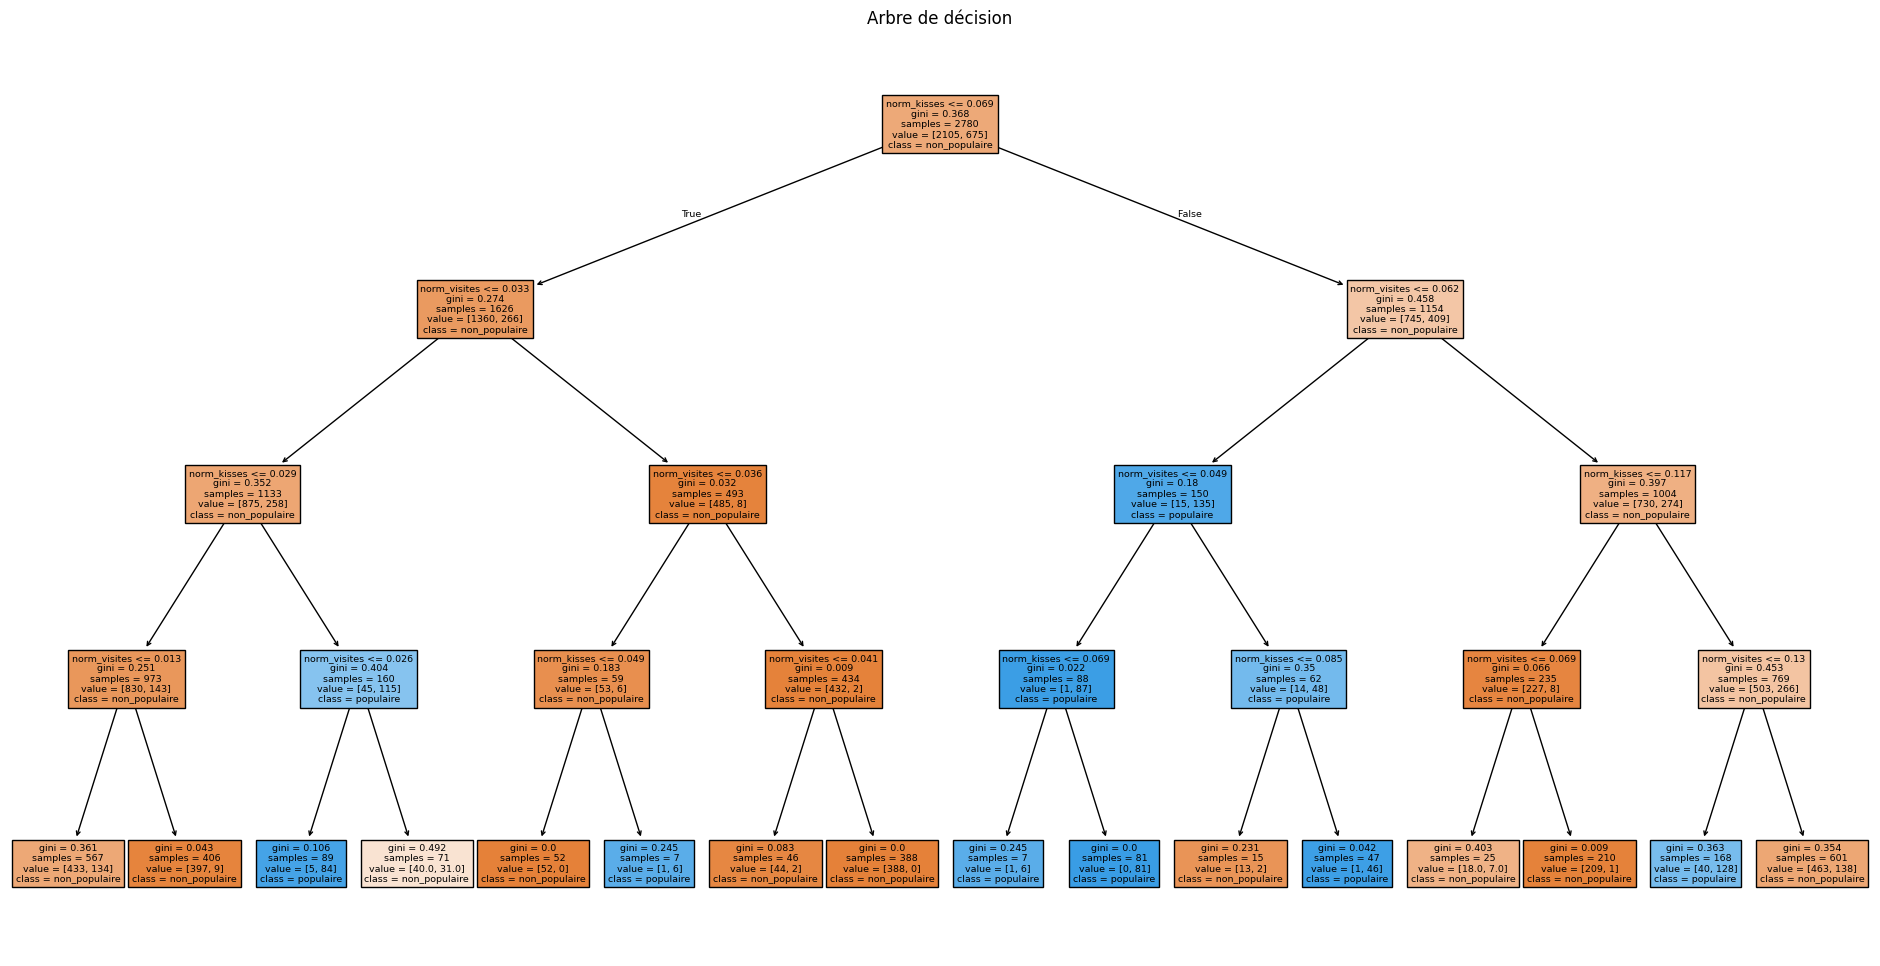

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour entraîner et évaluer un arbre de décision
def entrainer_et_evaluer_arbre_decision(X, y):
    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Créer le classifieur arbre de décision
    clf = DecisionTreeClassifier(max_depth=4, random_state=42)

    # Entraîner le modèle
    clf.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Évaluer le modèle
    precision = accuracy_score(y_test, y_pred)
    print(f'Précision du modèle : {precision:.2f}')

    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))

    # Afficher la matrice de confusion avec des couleurs
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['non_populaire', 'populaire'], yticklabels=['non_populaire', 'populaire'])
    plt.xlabel('Étiquettes prédites')
    plt.ylabel('Étiquettes réelles')
    plt.title('Matrice de confusion de l\'arbre de décision')
    plt.show()

    # Visualiser l'arbre de décision
    plt.figure(figsize=(24, 12))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['non_populaire', 'populaire'])
    plt.title("Arbre de décision")
    plt.show()

if __name__ == "__main__":
    # Sélectionner les caractéristiques pertinentes pour le modèle
    features = ['norm_visites', 'norm_kisses', 'norm_distance', 'isFlirtstar', 'isHighlighted', 'verified']

    # Préparer les données d'entrée (X) et la variable cible (y)
    X = dataset[features]
    y = dataset['compte_populaire']

    # Entraîner et évaluer le modèle d'arbre de décision
    entrainer_et_evaluer_arbre_decision(X, y)


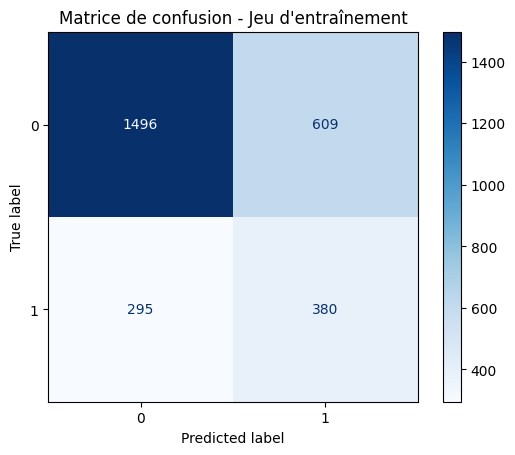

Score sur le jeu d'entraînement :  0.6748201438848921


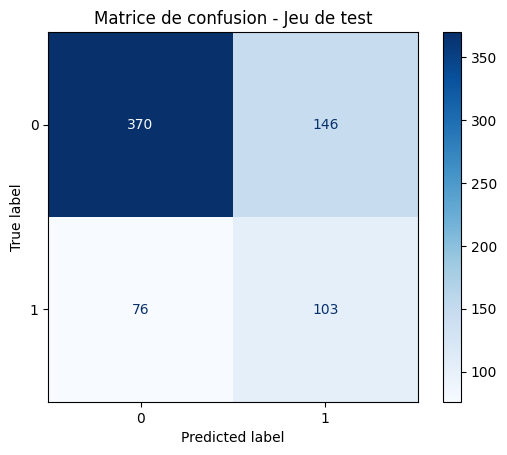

Score sur le jeu de test :  0.6805755395683454


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Fonction pour créer et entraîner un classifieur Bayésien Naïf
def bayesianClass(X_train, Y_train):
    clf = GaussianNB()
    clf.fit(X_train, np.ravel(Y_train))
    return clf

# Fonction pour générer et afficher une matrice de confusion en utilisant ConfusionMatrixDisplay
def confusionMatrixBC(bayesianClass, X_train, Y_train, X_test, Y_test):
    # Obtenir les prédictions
    Y_pred_train = bayesianClass.predict(X_train)
    Y_pred_test = bayesianClass.predict(X_test)
    
    # Créer la figure et les axes pour la matrice de confusion du jeu d'entraînement
    disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_pred_train))
    disp_train.plot(cmap='Blues', values_format='d')
    plt.title("Matrice de confusion - Jeu d'entraînement")
    plt.show()
    print("Score sur le jeu d'entraînement : ", bayesianClass.score(X_train, Y_train))
    
    # Créer la figure et les axes pour la matrice de confusion du jeu de test
    disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred_test))
    disp_test.plot(cmap='Blues', values_format='d')
    plt.title("Matrice de confusion - Jeu de test")
    plt.show()
    print("Score sur le jeu de test : ", bayesianClass.score(X_test, Y_test))

if __name__ == "__main__":
  
    # Spécifier les colonnes pertinentes pour X et Y
    colonnes_X = ['norm_visites', 'norm_kisses', 'norm_distance', 'isFlirtstar', 'isHighlighted', 'verified']
    colonne_Y = 'compte_populaire'

    # Séparer les données en caractéristiques (X) et variable cible (Y)
    X = dataset[colonnes_X]
    Y = dataset[colonne_Y]

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Entraîner et évaluer le classifieur Bayésien Naïf
    bc = bayesianClass(X_train, Y_train)
    confusionMatrixBC(bc, X_train, Y_train, X_test, Y_test)


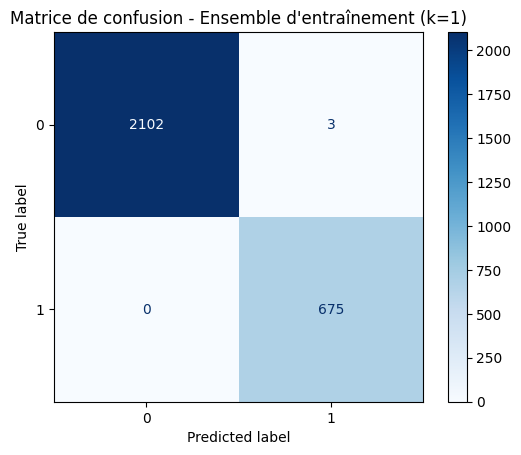

Précision sur l'ensemble d'entraînement :  0.9989208633093525


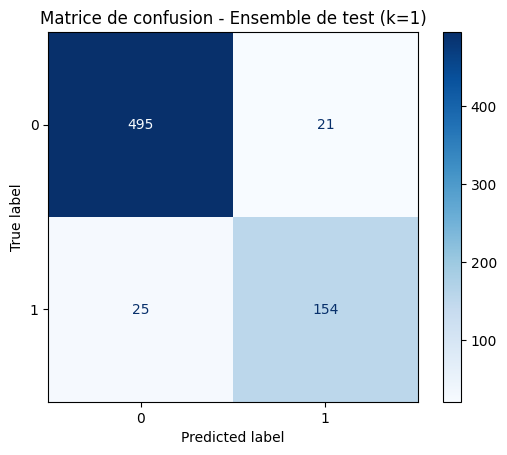

Précision sur l'ensemble de test :  0.9338129496402877


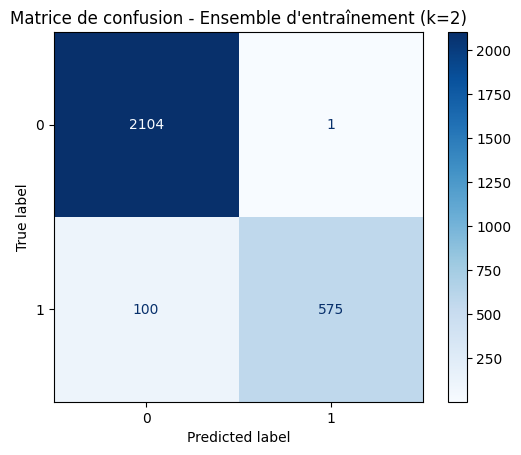

Précision sur l'ensemble d'entraînement :  0.9636690647482015


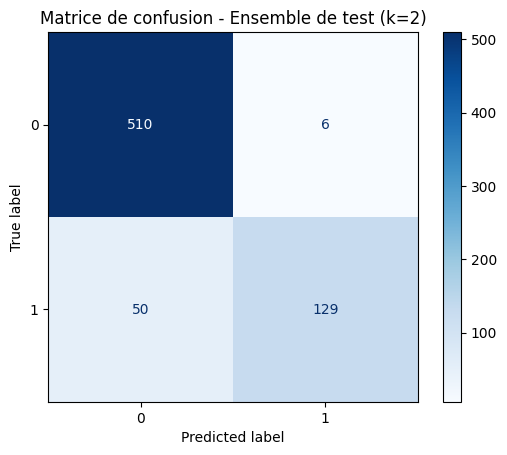

Précision sur l'ensemble de test :  0.9194244604316547


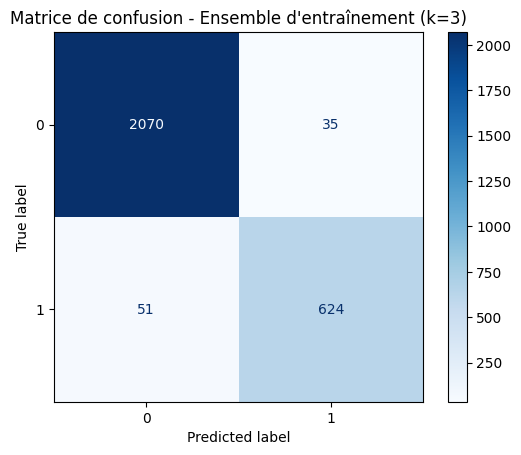

Précision sur l'ensemble d'entraînement :  0.9690647482014388


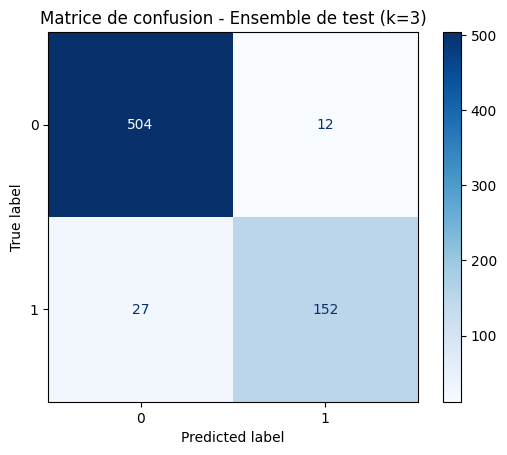

Précision sur l'ensemble de test :  0.943884892086331


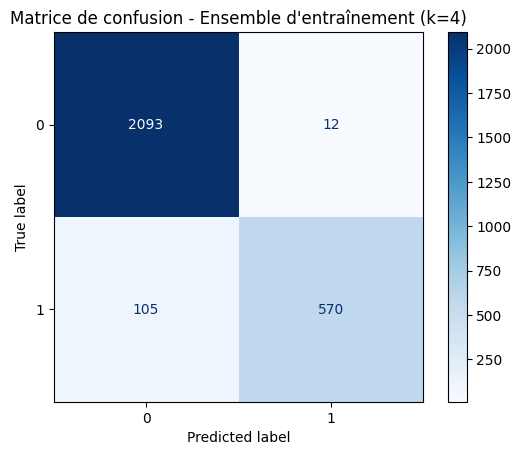

Précision sur l'ensemble d'entraînement :  0.9579136690647482


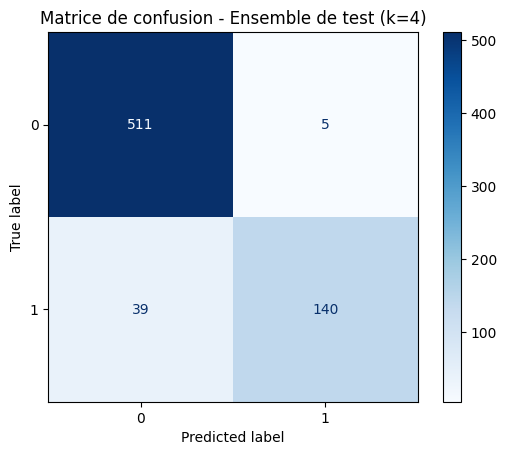

Précision sur l'ensemble de test :  0.9366906474820144


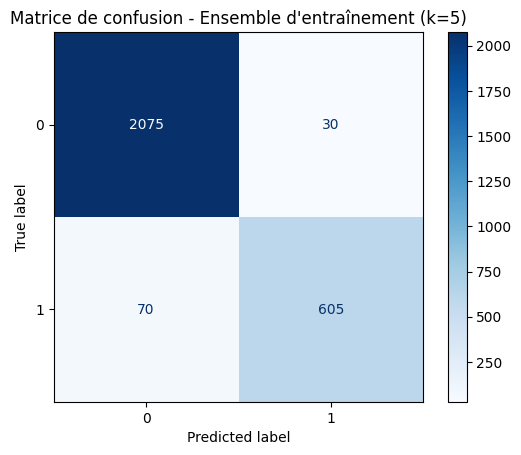

Précision sur l'ensemble d'entraînement :  0.9640287769784173


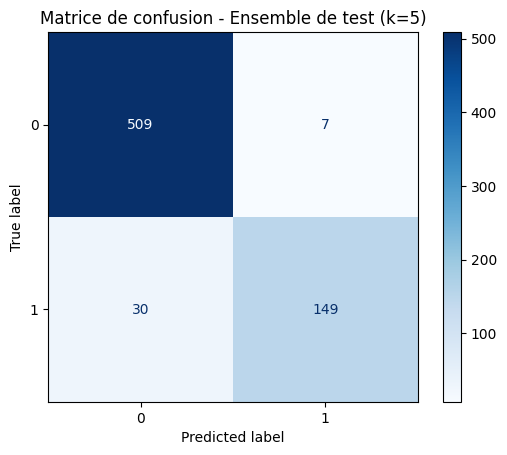

Précision sur l'ensemble de test :  0.9467625899280575


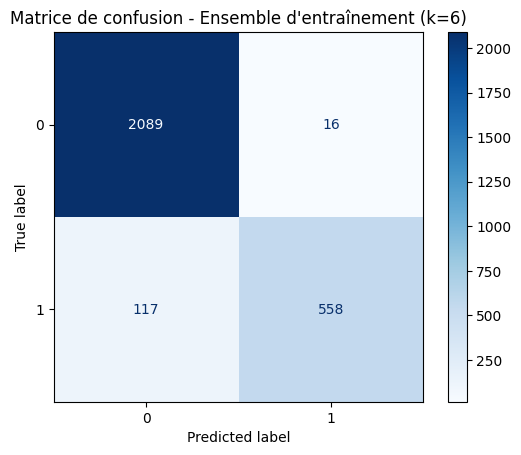

Précision sur l'ensemble d'entraînement :  0.952158273381295


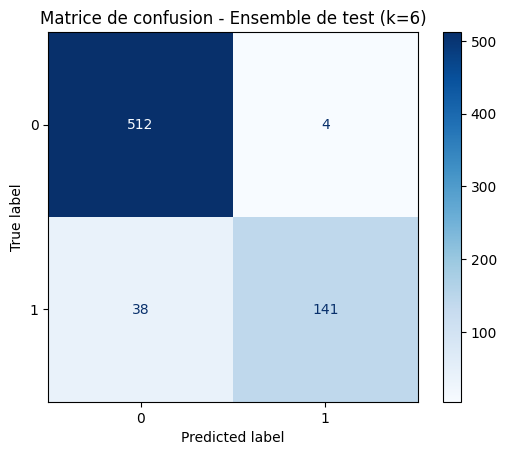

Précision sur l'ensemble de test :  0.939568345323741


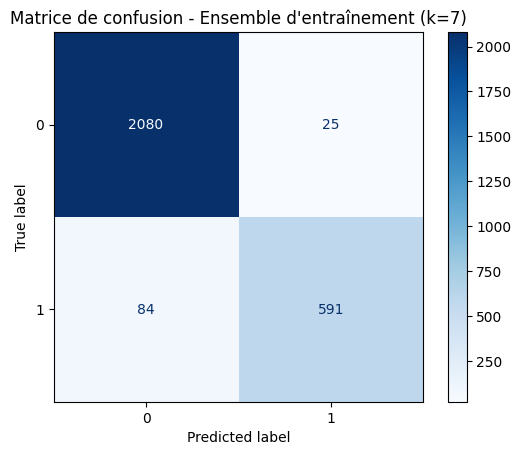

Précision sur l'ensemble d'entraînement :  0.9607913669064748


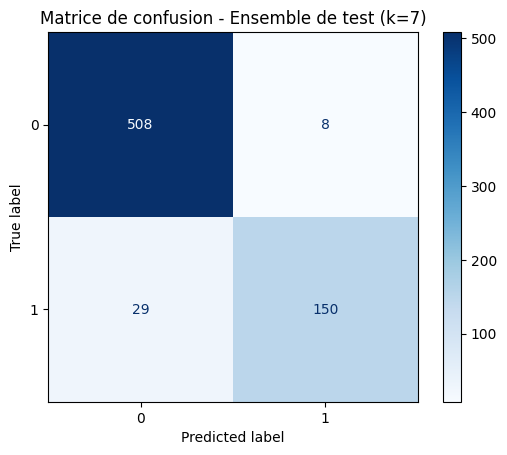

Précision sur l'ensemble de test :  0.9467625899280575


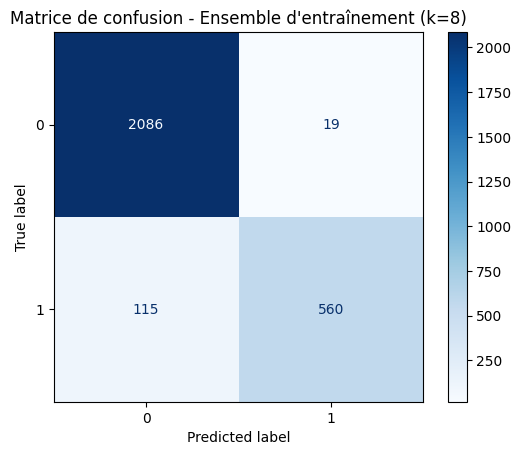

Précision sur l'ensemble d'entraînement :  0.9517985611510792


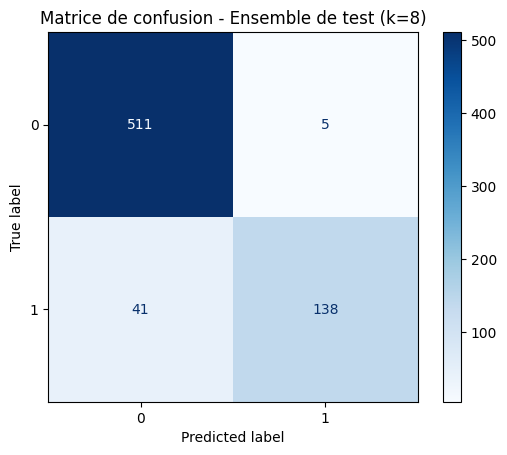

Précision sur l'ensemble de test :  0.9338129496402877


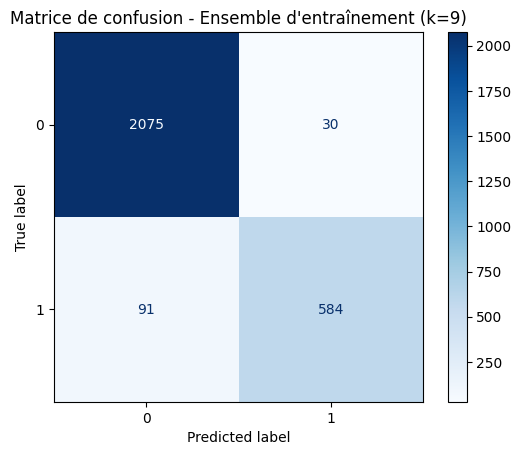

Précision sur l'ensemble d'entraînement :  0.9564748201438849


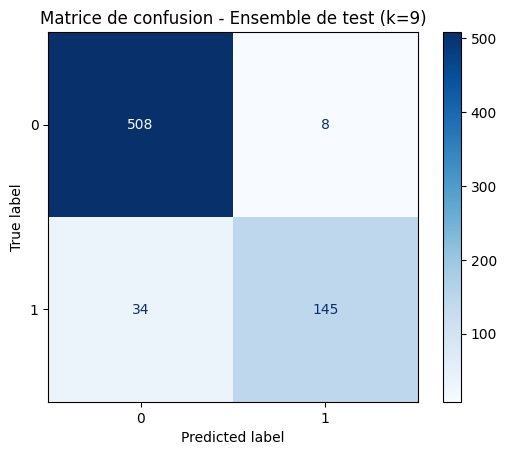

Précision sur l'ensemble de test :  0.939568345323741


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Fonction pour créer et entraîner un classificateur k-nn
def knnClass(k, X_train, Y_train):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, np.ravel(Y_train))
    return clf

# Fonction pour générer et afficher une matrice de confusion en utilisant ConfusionMatrixDisplay
def confusionMatrixknn(knnClass, X_train, Y_train, X_test, Y_test):
    # Obtenir les prédictions
    Y_pred_train = knnClass.predict(X_train)
    Y_pred_test = knnClass.predict(X_test)
    
    # Créer la figure et les axes pour la matrice de confusion sur l'ensemble d'entraînement
    disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_pred_train))
    disp_train.plot(cmap='Blues', values_format='d')
    plt.title("Matrice de confusion - Ensemble d'entraînement (k=" + str(knnClass.n_neighbors) + ")")
    plt.show()
    print("Précision sur l'ensemble d'entraînement : ", knnClass.score(X_train, Y_train))
    
    # Créer la figure et les axes pour la matrice de confusion sur l'ensemble de test
    disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred_test))
    disp_test.plot(cmap='Blues', values_format='d')
    plt.title("Matrice de confusion - Ensemble de test (k=" + str(knnClass.n_neighbors) + ")")
    plt.show()
    print("Précision sur l'ensemble de test : ", knnClass.score(X_test, Y_test))

if __name__ == "__main__":

    # Spécifier les colonnes pertinentes pour X et Y
    colonnes_X = ['norm_visites', 'norm_kisses', 'norm_distance', 'isFlirtstar', 'isHighlighted', 'verified']
    colonne_Y = 'compte_populaire'

    # Séparer les données en caractéristiques (X) et variable cible (Y)
    X = dataset[colonnes_X]
    Y = dataset[colonne_Y]

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Tester différents valeurs de k et évaluer le classificateur k-nn
    for k in range(1, 10):
        knn = knnClass(k, X_train, Y_train)
        confusionMatrixknn(knn, X_train, Y_train, X_test, Y_test)
